# Course Description

Being able to understand, use, and summarize non-numerical data—such as a person’s blood type or marital status—is a vital component of being a data scientist. In this course, you’ll learn how to manipulate and visualize categorical data using pandas and seaborn. Through hands-on exercises, you’ll get to grips with pandas' categorical data type, including how to create, delete, and update categorical columns. You’ll also work with a wide range of datasets including the characteristics of adoptable dogs, Las Vegas trip reviews, and census data to develop your skills at working with categorical data.

## Course introduction

#### Categorical vs. numerical

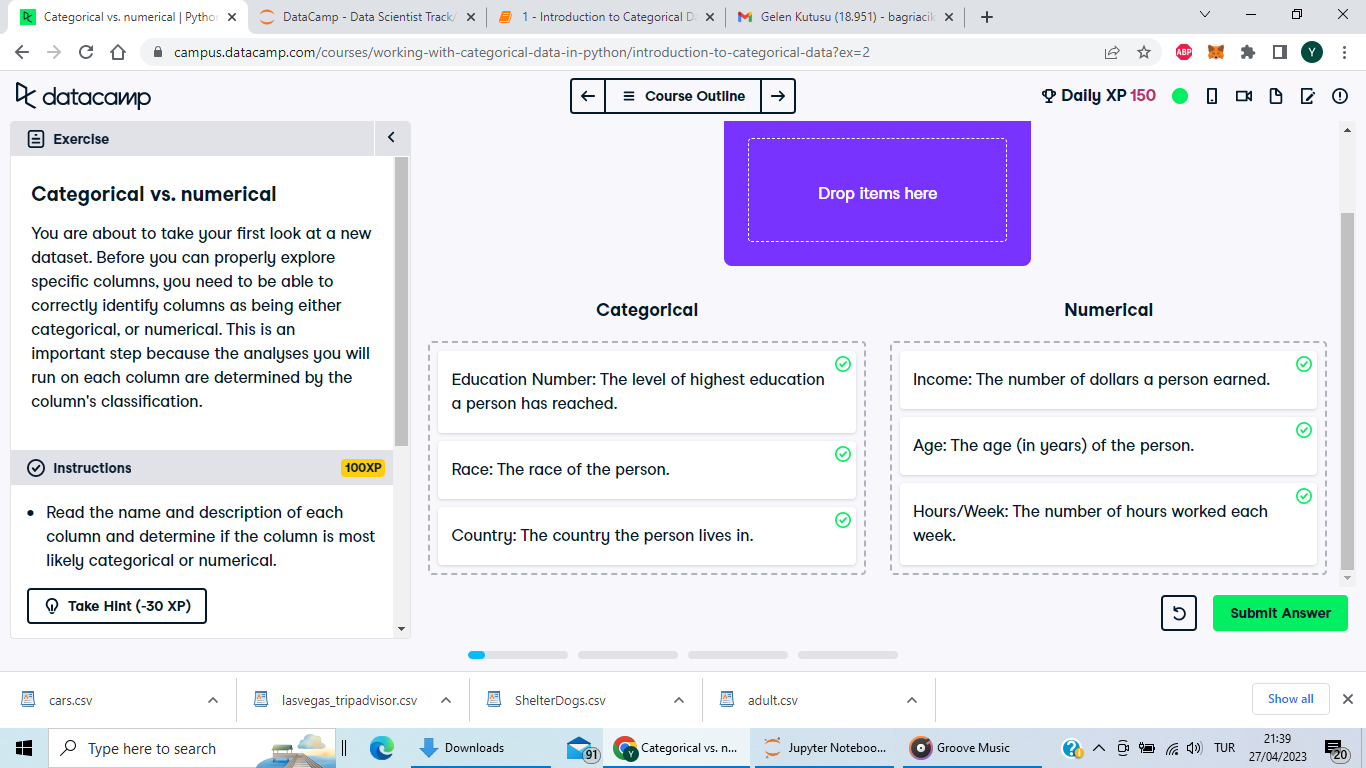

Great job! It is important to understand the types of columns in a dataset so that you can run proper analyses on those columns.

#### Exploring a target variable
You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, Above/Below 50k, you decide to explore the variable in more detail.

The Python package pandas will be used throughout this course and will be loaded as pd throughout. The adult census income dataset, adult, has also been preloaded for you.

In [1]:
import pandas as pd
adult = pd.read_csv("adult.csv")
adult

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# Explore the Above/Below 50k variable
print(adult["Above/Below 50k"].describe(),"\n")

# Print a frequency table of "Above/Below 50k"
print(adult["Above/Below 50k"].value_counts(),"\n")

# Print relative frequency values
print(adult["Above/Below 50k"].value_counts(normalize = True))

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object 

 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64 

 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


#### Question
Given the output from the previous steps, do more people make more or less than $50,000?<br>

a.More than $50,000$ <br>
<strong>b.Less than $50,000$</strong>



Well done! Above/Below 50k is a categorical variable with only two categories. Using both the .describe() and .value_counts() methods you can see that the dataset is a little imbalanced towards people making less than $50,000.

#### Ordinal categorical variables
Columns regarding a person's income do not have to be numerical. If the income amount is split into distinct categories, the new column will be categorical. Since these categories will have a natural order (smallest income to largest), the variable is considered ordinal.

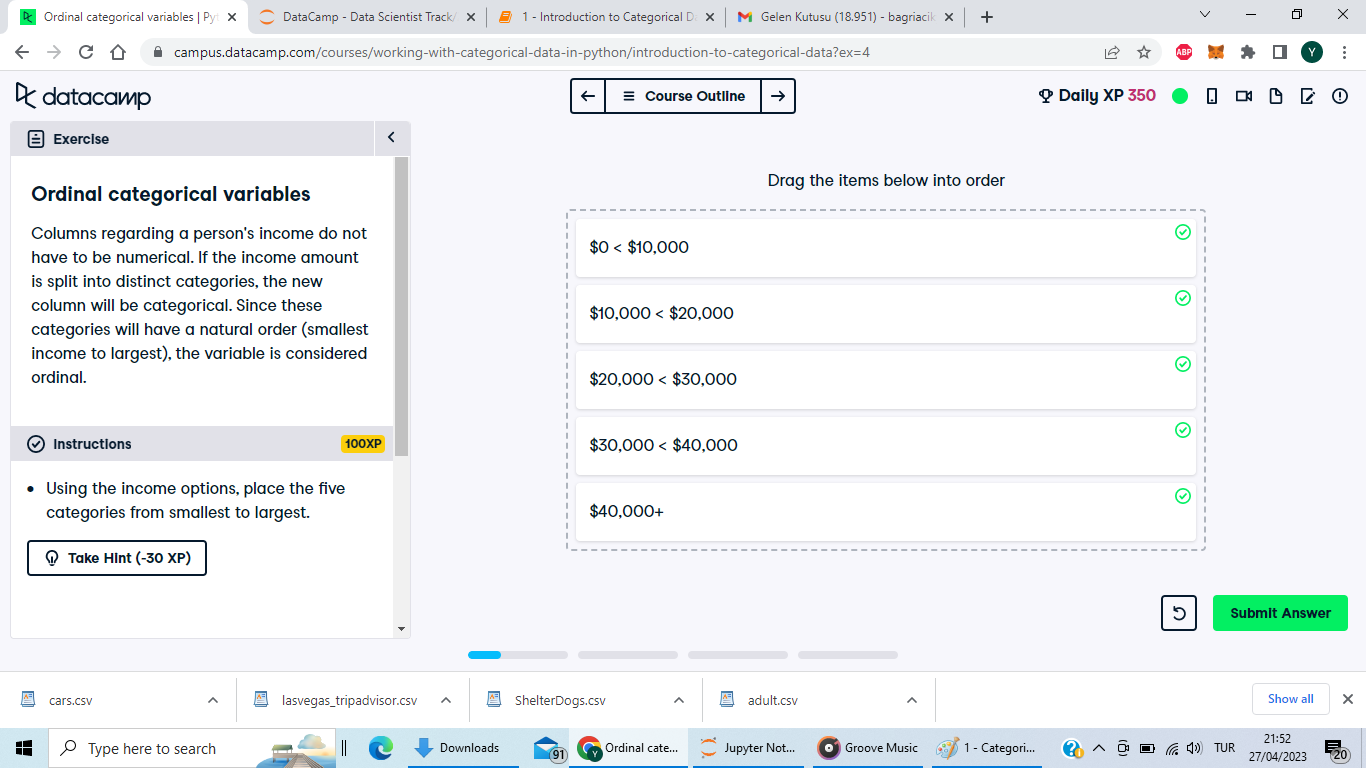

Well done! Even though the options contain numbers, the options are ranges - indicating a categorical variable. Note that the categories can be placed in a logical order, which makes this an ordinal variable.

## Categorical data in pandas

#### Setting dtypes and saving memory
A colleague of yours is exploring a list of occupations and how they relate to salary. She has given you a list of these occupations, list_of_occupations, and has a few simple questions such as "How many different titles are there?" and "Which position is the most common?".

In [3]:
list_of_occupations = ['Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Analyst',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 ]

In [4]:
# Create a Series, default dtype
series1 = pd.Series(list_of_occupations)

# Print out the data type and number of bytes for series1
print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

# Create a Series, "category" dtype
series2 = pd.Series(list_of_occupations, dtype="category")

# Print out the data type and number of bytes for series2
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)

series1 data type: object
series1 number of bytes: 8000
series2 data type: category
series2 number of bytes: 1024


Excellent work! Did you notice the memory savings when you used the dtype "category"? Take a look. It was a 7.5x decrease in memory.

#### Creating a categorical pandas Series
Another colleague at work has collected information on the number of "Gold", "Silver", and "Bronze" medals won by the USA at the Summer & Winter Olympics since 1896. She has provided this as a list, medals_won. Before taking a look at the total number of each medal won, you want to create a categorical pandas Series. However, you know that these medals have a specific order to them and that Gold is better than Silver, but Silver is better than Bronze. Use the object, medals_won, to help.

In [5]:
medals_won = ['Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Gold',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Silver',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Silver',
 'Bronze',
 'Bronze',
 'Bronze',
 'Gold',
 'Bronze',
 'Bronze',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Gold',
 ]

In [6]:
# Create a categorical Series and specify the categories (let pandas know the order matters!)
medals = pd.Categorical(medals_won, categories=["Bronze","Silver","Gold"],ordered = True)
print(medals)

[Silver, Silver, Bronze, Silver, Gold, ..., Silver, Bronze, Gold, Gold, Gold]
Length: 1000
Categories (3, object): [Bronze < Silver < Gold]


Great work. pd.Categorical() is a great way to create a Series and specify both the categories and whether or not the order of these categories is important.

#### Setting dtype when reading data
You are preparing to create a machine learning model to predict a person's income category using the adult census income dataset. You don't have access to any cloud resources and you want to make sure that your laptop will be able to load the full dataset and process its contents. You have read in the first five rows of the dataset adult to help you understand what kind of columns are available.

In [7]:
# Check the dtypes
print(adult.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object


#### Question
Based on the data types in adult, which columns are good candidates for specifying a dtype of "category" when reading in the adult dataset?<br>
<br>
a."Age", "Education Num", and "Race"<br>
b."Age", "Hours/Week", and "Capital Loss"<br>
c."Workclass", "Education Num", "Hours/Week", and "Above/Below 50k"<br>
<strong>d."Workclass", "Education", "Relationship", "Above/Below 50k"</strong>

In [8]:
# Check the dtypes
print(adult.dtypes,"\n\n")

# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {
   "Workclass": "category",
   "Education": "category",
   "Relationship": "category",
   "Above/Below 50k": "category" 
}

# Read in the CSV using the dtypes parameter
adult2 = pd.read_csv(
  "adult.csv",
  dtype = adult_dtypes
)
print(adult2.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object 


Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


Great job. Using the categorical dtype is a great way to save memory and boost performance. Specifying the dtypes will lower the amount of memory required to load your dataset. This is quite helpful when dealing with large datasets!

## Grouping data by category in pandas
#### Create lots of groups
You want to find the mean Age of adults when grouping by the following categories:

"Workclass" (which has 9 categories)
"Above/Below 50k" (which has 2 categories)
"Education" (which has 16 categories).
You have developed the following bit of code:

gb = adult.groupby(by=[ "Workclass",
                        "Above/Below 50k", 
                        "Education"])
How many groups are in the gb object and what is the maximum possible number of groups that could have been created? The dataset adult, and the gb object have been preloaded for you.

In [9]:
gb = adult.groupby(by=[ "Workclass",
                        "Above/Below 50k", 
                        "Education"]).count()
gb

Age  fnlgwt  Education Num  \
Workclass    Above/Below 50k Education                                   
 ?            <=50K           10th           98      98             98   
                              11th          118     118            118   
                              12th           38      38             38   
                              1st-4th        12      12             12   
                              5th-6th        28      28             28   
...                                         ...     ...            ...   
 State-gov    >50K            Some-college   31      31             31   
 Without-pay  <=50K           7th-8th         1       1              1   
                              Assoc-acdm      1       1              1   
                              HS-grad         9       9              9   
                              Some-college    3       3              3   

                                            Marital Status  Occupation  \
Workclass    Above/Below 50k Education                                   
 ?            <=50K           10th                      98          98   
                              11th                     118         118   
                              12th                      38          38   
                              1st-4th                   12          12   
                              5th-6th                   28          28   
...                                                    ...         ...   
 State-gov    >50K            Some-college              31          31   
 Without-pay  <=50K           7th-8th                    1           1   
                              Assoc-acdm                 1           1   
                              HS-grad                    9           9   
                              Some-college               3           3   

                                            Relationship  Race  Sex  \
Workclass    Above/Below 50k Education                                
 ?            <=50K           10th                    98    98   98   
                              11th                   118   118  118   
                              12th                    38    38   38   
                              1st-4th                 12    12   12   
                              5th-6th                 28    28   28   
...                                                  ...   ...  ...   
 State-gov    >50K            Some-college            31    31   31   
 Without-pay  <=50K           7th-8th                  1     1    1   
                              Assoc-acdm               1     1    1   
                              HS-grad                  9     9    9   
                              Some-college             3     3    3   

                                            Capital Gain  Capital Loss  \
Workclass    Above/Below 50k Education                                   
 ?            <=50K           10th                    98            98   
                              11th                   118           118   
                              12th                    38            38   
                              1st-4th                 12            12   
                              5th-6th                 28            28   
...                                                  ...           ...   
 State-gov    >50K            Some-college            31            31   
 Without-pay  <=50K           7th-8th                  1             1   
                              Assoc-acdm               1             1   
                              HS-grad                  9             9   
                              Some-college             3             3   

                                            Hours/Week  Country  
Workclass    Above/Below 50k Education                           
 ?            <=50K           10th                  98       98  
                              11t

#### Question
a.2 are created out of 2 possible groups.<br>
b.2 are created out of 18 possible groups.<br>
c.288 are created out of 288 possible groups.<br>
<strong>d.208 are created out of 288 possible groups.</strong>

Great job. Only combinations of the three variables that exist are created when using groupby(). In this example, 208 groups are created out of 288 (2 * 9 * 16) possible groups.

#### Setting up a .groupby() statement
The gender wage gap is a hot-topic item in the United States and across the world. Using the adult census income dataset, loaded as adult, you want to check if some of the recently published data lines up with this income survey.

In [10]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(["Sex","Above/Below 50k"])

# Print out how many rows are in each created group
print(gb.size(),"\n")

# Print out the mean of each group for all columns
print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64 

                               Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106  


Excellent! It does look like the proportion of women making more than 50k is a lot lower than men. However, women making more than 50k are on average younger than their male counterparts.

#### Using pandas functions effectively
You are creating a Python application that will calculate summary statistics based on user-selected variables. The complete dataset is quite large. For now, you are setting up your code using part of the dataset, preloaded as adult. As you create a reusable process, make sure you are thinking through the most efficient way to setup the GroupBy object.

In [11]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb["Hours/Week"].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

Great work. You just finished Chapter 1. People earning more than $50,000 tend to work a lot more hours, regardless of their education, than people earning less than $50,000. Remember, it's important to select your variables before calling a function. Large datatsets might have problems calculating the mean of every numerical column. Enjoying the course so far? Tell us what you think via Twitter!